In [420]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

Load data from files and combine based on player name

In [421]:
standard = pd.read_csv("C:/Users/ayamr/Documents/Coding/Data Sets/Baseball/FanGraphs Leaderboard.csv")
advanced = pd.read_csv("C:/Users/ayamr/Documents/Coding/Data Sets/Baseball/FanGraphs Leaderboard (1).csv")
value = pd.read_csv("C:/Users/ayamr/Documents/Coding/Data Sets/Baseball/FanGraphs Leaderboard (2).csv")
hof = pd.read_csv("C:/Users/ayamr/Documents/Coding/Data Sets/Baseball/FanGraphs Leaderboard (3).csv")

In [422]:
standard_advanced = pd.merge(standard, advanced, on='Name', how='left')
df_1 = pd.merge(standard_advanced, value, on='Name', how='left')

In [423]:
# will denote HOF inductee in larger dataset
hof['hof'] = 1
hof_2 = hof[['Name','hof']]
hof_2.head()

,Name,hof
0,Babe Ruth,1
1,Willie Mays,1
2,Ty Cobb,1
3,Honus Wagner,1
4,Hank Aaron,1


In [424]:
df = pd.merge(df_1, hof_2, on='Name', how='left')

Remove redundant colums and columns not needed

In [425]:
df.drop(['PA_y', 'Team_y', 'AVG_y', 'playerid_y', 'playerid_x', 'playerid', 'Team_x', 'Dollars'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4396 entries, 0 to 4395
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4396 non-null   object 
 1   G             4396 non-null   int64  
 2   AB            4396 non-null   int64  
 3   PA_x          4396 non-null   int64  
 4   H             4396 non-null   int64  
 5   1B            4396 non-null   int64  
 6   2B            4396 non-null   int64  
 7   3B            4396 non-null   int64  
 8   HR            4396 non-null   int64  
 9   R             4396 non-null   int64  
 10  RBI           4396 non-null   int64  
 11  BB            4396 non-null   int64  
 12  IBB           2705 non-null   float64
 13  SO            4258 non-null   float64
 14  HBP           4340 non-null   float64
 15  SF            2732 non-null   float64
 16  SH            4113 non-null   float64
 17  GDP           3213 non-null   float64
 18  SB            4383 non-null 

Drop additional stat lines that weren't recorded in the early years or fill NaN's with 0 if there was no recorded stat

In [426]:
df['hof'] = df['hof'].fillna(0)

In [427]:
df.isna().sum()

Name               0
G                  0
AB                 0
PA_x               0
H                  0
1B                 0
2B                 0
3B                 0
HR                 0
R                  0
RBI                0
BB                 0
IBB             1691
SO               138
HBP               56
SF              1664
SH               283
GDP             1183
SB                13
CS               779
AVG_x              0
BB%                0
K%               138
BB/K             138
OBP                0
SLG                0
OPS                0
ISO                0
Spd               13
BABIP            138
UBR             3186
wGDP            3186
wSB                0
wRC                0
wRAA               0
wOBA               0
wRC+               0
Team               0
Batting            0
Base Running       0
Fielding           0
Positional         0
Offense            0
Defense            0
League             0
Replacement        0
RAR                0
WAR          

In [428]:
df.drop(['IBB', 'HBP', 'SF', 'SH', 'GDP', 'UBR', 'wGDP', 'BABIP', 'Team'], axis=1, inplace=True)
df['SB'] = df['SB'].fillna(0)
df['CS'] = df['CS'].fillna(0)
df['Spd'] = df['Spd'].fillna(0)
df.isna().sum()

Name              0
G                 0
AB                0
PA_x              0
H                 0
1B                0
2B                0
3B                0
HR                0
R                 0
RBI               0
BB                0
SO              138
SB                0
CS                0
AVG_x             0
BB%               0
K%              138
BB/K            138
OBP               0
SLG               0
OPS               0
ISO               0
Spd               0
wSB               0
wRC               0
wRAA              0
wOBA              0
wRC+              0
Batting           0
Base Running      0
Fielding          0
Positional        0
Offense           0
Defense           0
League            0
Replacement       0
RAR               0
WAR               0
hof               0
dtype: int64

In [429]:
null_names = df[df['K%'].isna()]
null_names
# All of these players are from the early 1900's when these stats likely weren't recorded. (SO, K%, BB/K)

,Name,G,AB,PA_x,H,1B,2B,3B,HR,R,...,Base Running,Fielding,Positional,Offense,Defense,League,Replacement,RAR,WAR,hof
95,Elmer Flick,1483,5597,6414,1752,1272,268,164,48,950,...,16.4,30.0,-71.8,365.5,-41.8,25.2,194.1,542.9,56.0,1.0
186,Chick Stahl,1304,5069,5709,1546,1173,219,118,36,858,...,-5.5,29.0,-49.5,151.1,-20.5,24.5,179.5,334.6,33.1,0.0
250,George Stone,849,3274,3668,986,789,106,68,23,428,...,-1.4,9.0,-41.4,147.5,-32.4,10.0,100.0,225.2,26.3,0.0
270,Emmet Heidrick,757,3047,3308,914,717,108,73,16,468,...,15.0,16.0,-24.3,58.7,-8.3,14.6,104.3,169.3,16.5,0.0
370,Charlie Hickman,1081,3982,4252,1176,809,217,91,59,478,...,-11.5,-42.0,-20.7,121.9,-62.7,16.9,126.9,203.1,21.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,Jack Powell,585,1610,1754,309,249,38,14,8,133,...,-8.2,0.0,59.9,-125.6,59.9,6.9,53.8,-4.9,-0.3,0.0
4312,Fritz Buelow,431,1334,1468,256,207,25,18,6,125,...,-3.2,-3.0,11.7,-89.0,8.7,5.8,43.6,-31.0,-3.5,0.0
4314,Bill Dineen,417,1143,1271,219,195,18,5,1,99,...,-1.5,-1.0,31.2,-87.0,30.2,5.3,38.9,-12.6,-1.2,0.0
4328,John Gochnauer,264,908,1030,170,130,32,8,0,94,...,-1.8,5.0,16.3,-62.9,21.3,4.8,31.4,-5.4,-0.6,0.0


In [430]:
avg_so_game = df['SO'].mean() / df['G'].mean()
df['SO'] = df['SO'].fillna(avg_so_game * df['G'])

In [431]:
elmer = df.loc[(df['Name'] == 'Elmer Flick')]
elmer.SO.describe()

count      1.000000
mean     665.859214
std             NaN
min      665.859214
25%      665.859214
50%      665.859214
75%      665.859214
max      665.859214
Name: SO, dtype: float64

In [432]:
df.drop(['K%', 'BB/K'], axis=1, inplace=True)
df.isna().sum()

Name            0
G               0
AB              0
PA_x            0
H               0
1B              0
2B              0
3B              0
HR              0
R               0
RBI             0
BB              0
SO              0
SB              0
CS              0
AVG_x           0
BB%             0
OBP             0
SLG             0
OPS             0
ISO             0
Spd             0
wSB             0
wRC             0
wRAA            0
wOBA            0
wRC+            0
Batting         0
Base Running    0
Fielding        0
Positional      0
Offense         0
Defense         0
League          0
Replacement     0
RAR             0
WAR             0
hof             0
dtype: int64

Exploratory Data Analysis

<AxesSubplot:xlabel='AVG_x', ylabel='Count'>

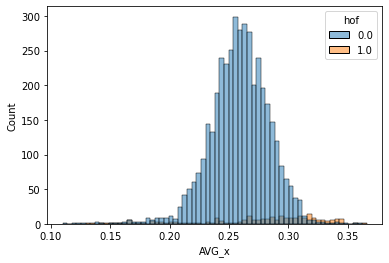

In [433]:
sns.histplot(data=df, x='AVG_x', hue='hof')

In [434]:
df.columns

Index(['Name', 'G', 'AB', 'PA_x', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI',
       'BB', 'SO', 'SB', 'CS', 'AVG_x', 'BB%', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+', 'Batting', 'Base Running',
       'Fielding', 'Positional', 'Offense', 'Defense', 'League', 'Replacement',
       'RAR', 'WAR', 'hof'],
      dtype='object')

In [435]:
corr = df.corr()
hof_corr = corr['hof']
hof_corr.sort_values(ascending=False)

hof             1.000000
RAR             0.480242
WAR             0.474544
wRAA            0.409952
wRC             0.403243
Offense         0.398042
R               0.391176
Batting         0.389212
RBI             0.375944
H               0.369732
3B              0.360190
1B              0.360077
Replacement     0.347933
PA_x            0.341807
BB              0.340475
2B              0.339235
AB              0.335896
G               0.326510
League          0.308733
HR              0.258063
SB              0.243012
wSB             0.174066
wOBA            0.154895
Fielding        0.153279
CS              0.142371
AVG_x           0.134324
OPS             0.133338
SO              0.133273
OBP             0.125937
SLG             0.122529
wRC+            0.121192
Base Running    0.112621
Defense         0.098314
ISO             0.082287
Spd             0.051535
Positional      0.010813
Name: hof, dtype: float64

<AxesSubplot:xlabel='RAR', ylabel='Count'>

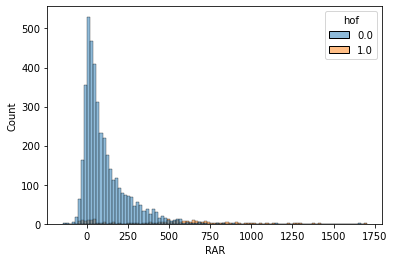

In [436]:
sns.histplot(data=df, x='RAR', hue='hof')

<AxesSubplot:>

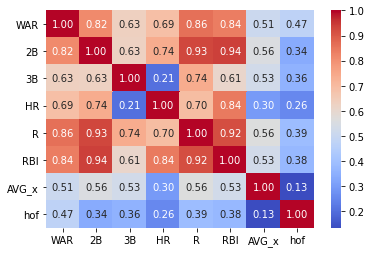

In [437]:
sns.heatmap(df[['WAR', '2B', '3B', 'HR', 'R', 'RBI', 'AVG_x','hof']].corr(), 
                annot=True, fmt='.2f', cmap='coolwarm')


In [438]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
G,4396.0,967.445860,561.254500,206.000,514.750,826.000,1312.250,3562.000
AB,4396.0,3220.653776,2137.214672,798.000,1483.000,2575.000,4469.500,14053.000
PA_x,4396.0,3610.556642,2424.618237,1000.000,1640.000,2875.500,5010.250,15876.000
H,4396.0,866.468153,633.182764,90.000,371.000,659.500,1199.250,4256.000
1B,4396.0,615.436306,442.078655,83.000,272.000,474.000,848.000,3215.000
2B,4396.0,149.831210,117.378736,5.000,61.000,111.000,208.000,792.000
3B,4396.0,29.892175,31.245918,0.000,10.000,20.000,38.000,309.000
HR,4396.0,71.308462,92.428187,0.000,13.000,37.000,92.000,762.000
R,4396.0,443.976115,351.309417,36.000,178.000,324.000,612.250,2295.000
RBI,4396.0,402.556642,336.967915,23.000,157.000,287.000,536.000,2297.000


In [439]:
df['BB%'] = df['BB%'].str[:-1]

In [440]:
df['BB%'] = df['BB%'].apply(lambda x: float(x)/100)
df['BB%'].value_counts()

0.071    80
0.074    73
0.070    70
0.077    70
0.076    68
         ..
0.005     1
0.194     1
0.173     1
0.206     1
0.004     1
Name: BB%, Length: 176, dtype: int64

In [441]:
#for column in df.columns:
#    plt.figure()
#    sns.histplot(data=df, x=column)
#    plt.title(column)

Scale the features

In [442]:
columns_to_log = ['G', 'AB', 'PA_x', 'H', '1B', '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'SO', 'SB', 'CS', 'League', 'Replacement', 'RAR', 'WAR' ]
normal_distribution = ['AVG_x', 'BB%', 'OBP', 'SLG', 'OPS', 'Spd', 'ISO', 'wSB', 'wRC', 'wRAA', 'wOBA', 
                        'wRC+', 'Batting', 'Base Running', 'Fielding', 'Positional', 'Offense', 'Defense']

In [443]:
# Log transform the selected columns to make the data more Gaussian-like
df[columns_to_log] = df[columns_to_log].apply(lambda x: np.log(x + abs(x.min()) + 1))
scaler = StandardScaler()
# Fit the scaler to the selected columns in the DataFrame
df[columns_to_log] = scaler.fit_transform(df[columns_to_log])

# scale normally distributed columns
scaler = StandardScaler() 
df[normal_distribution] = scaler.fit_transform(df[normal_distribution])

Feature Selection

In [444]:
# drop name for training
df_2 = df.drop(['Name'], axis=1)

In [445]:
# Split the data into features and target
X = df_2.drop(['hof'], axis=1)
y = df_2["hof"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest classifier on the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Use SelectFromModel to select the most important features
selector = SelectFromModel(rf, threshold="median")
selector.fit(X_train, y_train)

# Get the selected features
X_important_train = selector.transform(X_train)
X_important_test = selector.transform(X_test)

# Evaluate the performance of the classifier on the important features
rf.fit(X_important_train, y_train)
print("Accuracy on important features:", rf.score(X_important_test, y_test))

importances = rf.feature_importances_

# Create a list of feature names and their importances
features = list(zip(X_train.columns, importances))

# Sort the features by importance
features.sort(key=lambda x: x[1], reverse=True)

# Print the sorted features
print("Features used in the classifier:")
for feature in features:
    print(feature[0], ":", feature[1])

Accuracy on important features: 0.9681818181818181
Features used in the classifier:
OBP : 0.12287631374743635
1B : 0.09511616559135903
SLG : 0.09478664095537079
R : 0.06811097420065228
3B : 0.05557198841676333
RBI : 0.05506074547845888
SB : 0.05318941532338714
H : 0.04994395545940045
CS : 0.04887233825757582
PA_x : 0.04808234274826952
AB : 0.04606722153180684
BB : 0.04300038408151626
SO : 0.04046259893660548
2B : 0.0378751724761379
HR : 0.03726933886479402
BB% : 0.03606199954594638
AVG_x : 0.03440836086993489
G : 0.033244043514584626


In [446]:
# Initialize a list of models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(),
    XGBClassifier()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {accuracy:.2f}")

c:\Users\ayamr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.96
DecisionTreeClassifier: 0.95
KNeighborsClassifier: 0.95
LinearDiscriminantAnalysis: 0.96
GaussianNB: 0.86
SVC: 0.97
RandomForestClassifier: 0.97
GradientBoostingClassifier: 0.97


c:\Users\ayamr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier: 0.96
XGBClassifier: 0.97


Apply the model to my data

In [447]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X)
df['Prediction'] = y_pred

In [448]:
final_columns = ['Name', 'hof', 'Prediction']
final_df = df[final_columns]
final_df

,Name,hof,Prediction
0,Ty Cobb,1.0,1.0
1,Ross Barnes,0.0,0.0
2,Rogers Hornsby,1.0,1.0
3,Joe Jackson,0.0,1.0
4,Levi Meyerle,0.0,0.0
...,...,...,...
4391,Bill Doak,0.0,0.0
4392,Milt Pappas,0.0,0.0
4393,Bob Friend,0.0,0.0
4394,Jerry Koosman,0.0,0.0


Final Output

In [449]:
# The table below displays players that the model predicts should be in the hall of fame, but who are not. 
# Jim Kaat, row 4333, was actually inducted into the Hall of Fame in 2022, which is not reflected in the data available. 
final_df[(df['hof'] == 0) & (df['Prediction'] == 1)]

,Name,hof,Prediction
3,Joe Jackson,0.0,1.0
32,John McGraw,0.0,1.0
88,George Van Haltren,0.0,1.0
238,Buster Posey,0.0,1.0
388,Alex Rodriguez,0.0,1.0
1152,Willie Randolph,0.0,1.0
4333,Jim Kaat,0.0,1.0
4350,Paul Derringer,0.0,1.0


Load active only data set to use trained model on

In [450]:
active_standard = pd.read_csv("Active Standard.csv")
active_advanced = pd.read_csv("Active Advanced.csv")
active_value = pd.read_csv("Active Value.csv")
# Combine csvs with left join
active_standard_advanced = pd.merge(active_standard, active_advanced, on='Name', how='left')
active = pd.merge(active_standard_advanced, value, on='Name', how='left')

In [451]:
active.drop(['PA_y', 'Team_y', 'AVG_y', 'playerid_y', 'playerid_x', 'playerid', 'Team_x', 'Dollars', 
            'IBB', 'HBP', 'SF', 'SH', 'GDP', 'UBR', 'wGDP', 'BABIP', 'Team', 'K%', 'BB/K'], axis=1, inplace=True)
active.isna().sum()

Name              0
G                 0
AB                0
PA_x              0
H                 0
1B                0
2B                0
3B                0
HR                0
R                 0
RBI               0
BB                0
SO                0
SB                0
CS                0
AVG_x             0
BB%               0
OBP               0
SLG               0
OPS               0
ISO               0
Spd               0
wSB               0
wRC               0
wRAA              0
wOBA              0
wRC+            244
Batting         822
Base Running    822
Fielding        822
Positional      822
Offense         822
Defense         822
League          822
Replacement     822
RAR             822
WAR             822
dtype: int64

In [452]:
# It looks like only the top players in the data set were given value ranks, since they're more likely to be in the HOF anyway, 
# I'm only keeping those rows for now. 
active.dropna(inplace=True)
active.describe().T

,count,mean,std,min,25%,50%,75%,max
G,222.0,745.351351,418.569091,39.0,428.50000,644.0000,975.50000,2699.000
AB,222.0,2595.418919,1601.568222,1.0,1371.50000,2159.0000,3332.00000,10022.000
PA_x,222.0,2921.072072,1822.500851,1.0,1537.75000,2437.5000,3694.50000,11426.000
H,222.0,688.432432,467.166778,0.0,340.50000,548.5000,885.25000,3088.000
1B,222.0,427.590090,293.908393,0.0,207.50000,334.5000,546.75000,1957.000
2B,222.0,140.761261,97.030488,0.0,70.50000,111.5000,181.50000,607.000
3B,222.0,13.180180,11.484554,0.0,4.25000,10.0000,18.00000,58.000
HR,222.0,106.900901,84.491929,0.0,45.25000,82.0000,145.50000,507.000
R,222.0,378.031532,256.024946,0.0,185.00000,302.0000,484.75000,1530.000
RBI,222.0,363.671171,262.563804,0.0,178.00000,282.5000,475.50000,1847.000


In [454]:
active['BB%'] = active['BB%'].str[:-1]
active['BB%'] = active['BB%'].apply(lambda x: float(x)/100)

In [455]:
active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 29 to 972
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          222 non-null    object 
 1   G             222 non-null    int64  
 2   AB            222 non-null    int64  
 3   PA_x          222 non-null    int64  
 4   H             222 non-null    int64  
 5   1B            222 non-null    int64  
 6   2B            222 non-null    int64  
 7   3B            222 non-null    int64  
 8   HR            222 non-null    int64  
 9   R             222 non-null    int64  
 10  RBI           222 non-null    int64  
 11  BB            222 non-null    int64  
 12  SO            222 non-null    int64  
 13  SB            222 non-null    int64  
 14  CS            222 non-null    int64  
 15  AVG_x         222 non-null    float64
 16  BB%           222 non-null    float64
 17  OBP           222 non-null    float64
 18  SLG           222 non-null   

In [457]:
# drop name to match the training data set
active_2 = active.drop('Name', axis=1)

In [461]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(active_2)
active['Prediction'] = y_pred

In [463]:
active_final_columns = ['Name', 'Prediction']
active_final_df = active[active_final_columns]
active_final_df

,Name,Prediction
29,Luis Arraez,1.0
31,Miguel Cabrera,0.0
33,Jeff McNeil,1.0
34,Jose Altuve,1.0
36,Mike Trout,1.0
...,...,...
464,Austin Hedges,0.0
512,Joe Kelly,0.0
576,Luis Castillo,1.0
765,Jose Castillo,0.0


In [466]:
active_final_df_2 =  active[active['Prediction'] == 1]
active_final_df_2

,Name,G,AB,PA_x,H,1B,2B,3B,HR,R,...,Base Running,Fielding,Positional,Offense,Defense,League,Replacement,RAR,WAR,Prediction
29,Luis Arraez,389,1413,1569,444,345,77,8,14,216,...,1.7,-16.0,-8.0,39.6,-24.0,5.6,48.4,69.6,7.1,1.0
33,Jeff McNeil,516,1837,2039,564,388,121,9,46,258,...,1.0,19.6,-4.3,78.6,15.3,2.5,62.9,159.3,16.1,1.0
34,Jose Altuve,1578,6305,6950,1935,1335,379,29,192,986,...,6.8,-19.2,18.8,243.0,-0.4,21.5,208.0,472.1,48.5,1.0
36,Mike Trout,1407,5094,6159,1543,846,296,51,350,1052,...,61.8,-6.5,5.8,586.5,-0.7,22.4,183.7,791.8,82.1,1.0
37,Trea Turner,849,3424,3737,1033,682,191,36,124,586,...,42.1,3.9,32.9,155.9,36.9,5.4,114.7,312.8,31.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,Aaron Hicks,870,2809,3276,648,423,111,14,100,419,...,18.8,-1.1,0.7,13.9,-0.4,9.2,98.5,121.2,12.4,1.0
383,Trent Grisham,394,1284,1486,285,169,58,10,48,185,...,8.3,12.5,3.8,5.1,16.3,4.4,46.1,71.8,7.2,1.0
415,Dylan Moore,381,921,1073,192,106,45,6,35,140,...,3.7,16.4,-2.5,2.9,13.9,3.6,33.4,53.8,5.4,1.0
448,Joey Gallo,752,2364,2811,471,196,89,9,177,400,...,19.5,28.6,-28.4,54.8,0.2,9.4,86.4,150.7,15.1,1.0
